# yfinance Library Assignment  

In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### Function Specification: `download_historical_data`

Implement the function `download_historical_data` to fetch historical price data using Yahoo Finance as the data source. This function should be capable of fetching historical data for a specified stock symbol between given start and end dates. Additionally, it should support an optional parameter for the data timeframe with a default value of `'1d'` (daily).

---

### Function Specifications

**Parameters:**
- `symbol`: The ticker symbol of the stock (e.g., `'RELIANCE.NS'`).
- `start_date`: Start date for the data in `'YYYY-MM-DD'` format.
- `end_date`: End date for the data in `'YYYY-MM-DD'` format.
- `timeframe`: The frequency of the data (`'1d'`, `'1wk'`, `'1mo'`), default is `'1d'`.

**Return:**  
A pandas `DataFrame` containing the fetched data.


In [6]:
def download_historical_data(symbol, start_date, end_date, timeframe='1d'):
  data = yf.download(symbol, start=start_date, end=end_date, interval=timeframe, auto_adjust=False, back_adjust=False)
  return data

### Visualization

Create a function for plotting the stock closing prices. This function should accept parameters for the plot and its objective is to display the graph.
   


In [7]:
def plot_closing_price(df, title="Stock Closing Price"):
  plt.figure(figsize=(12, 6))

  if isinstance(df.columns, pd.Index) and 'Close' in df.columns:
    plt.plot(df.index, df['Close'])
  else:

    for column in df.columns:

        if isinstance(df.columns, pd.MultiIndex):
            label = column[0]
        else:

            label = column
        plt.plot(df.index, df[column], label=label)
    plt.legend()

  plt.xlabel('Date')
  plt.ylabel('Closing Price')
  plt.title(title)
  plt.grid(True)
  plt.show()

### Run the functions

**Choose Stocks:**  
   - Select any three stocks of your choice.
   - Fetch their data for the time period from **2012 to 2022**.
   - Select daily time frame i.e. 1d.

**Plot the Data:**  
   1. Plot the data for each stock separately.  
   2. Combine the data and plot all three stocks on the **same graph** for comparison.

[*********************100%***********************]  1 of 1 completed


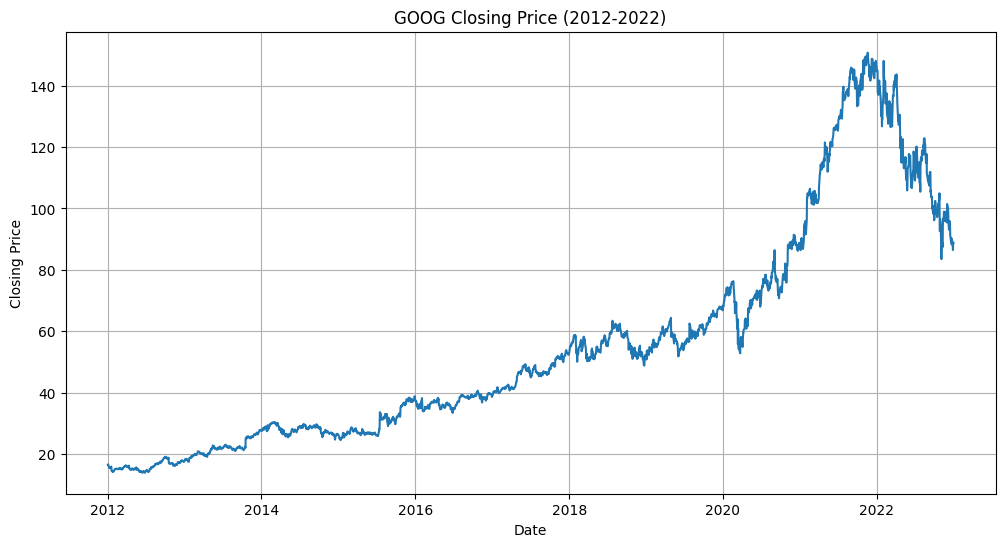

[*********************100%***********************]  1 of 1 completed


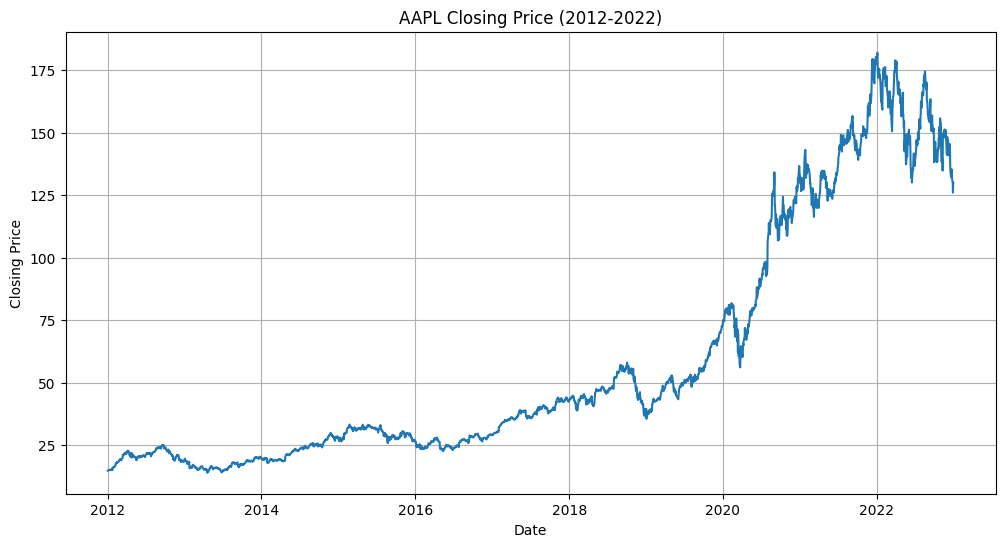

[*********************100%***********************]  1 of 1 completed


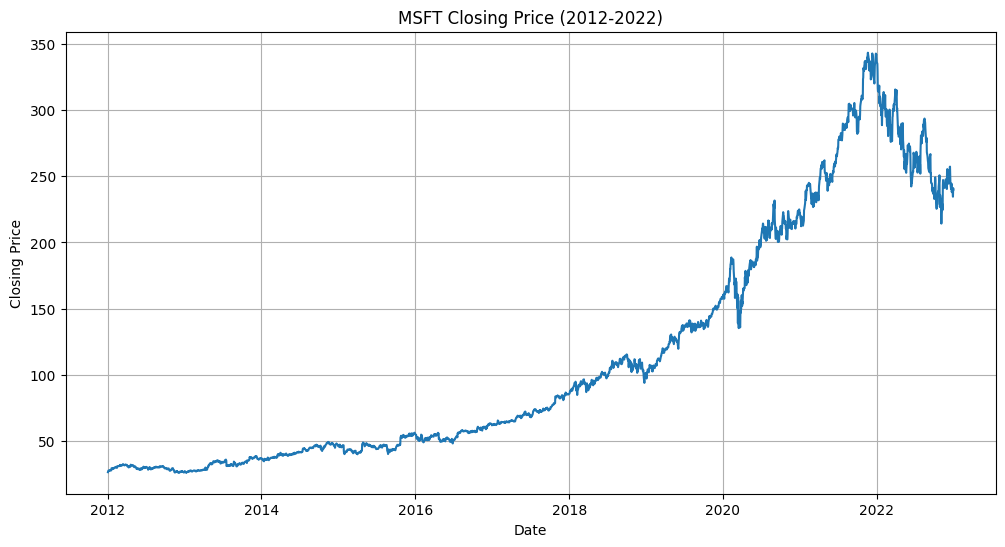

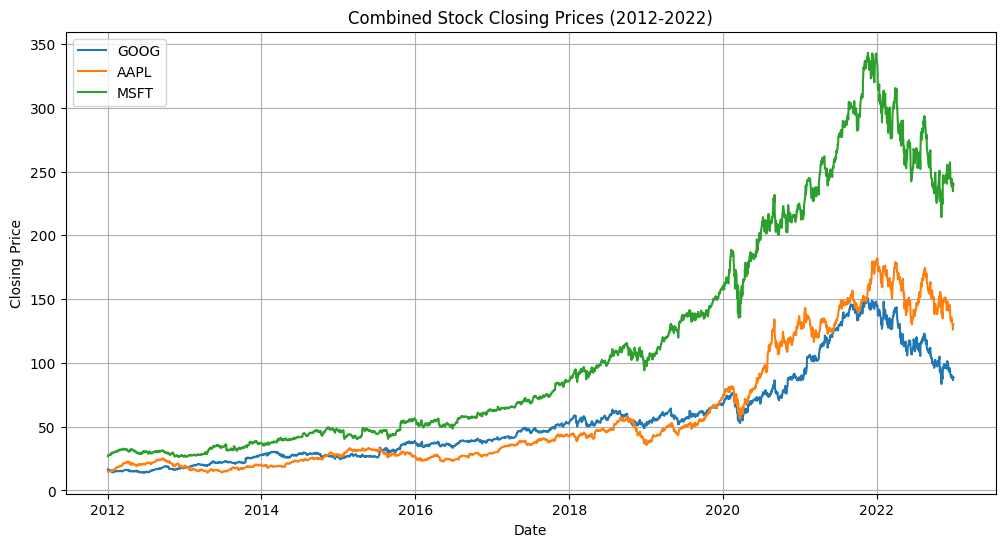

In [8]:
stock_symbols = ['GOOG', 'AAPL', 'MSFT']

stock_data = {}
for symbol in stock_symbols:
  df = download_historical_data(symbol, '2012-01-01', '2022-12-31', '1d')
  stock_data[symbol] = df
  plot_closing_price(df, title=f'{symbol} Closing Price (2012-2022)')

# Select only the 'Close' price for each stock before concatenating
combined_data = pd.concat([df['Close'] for df in stock_data.values()], axis=1, keys=stock_data.keys())

plot_closing_price(combined_data, title='Combined Stock Closing Prices (2012-2022)')

### Technical Analysis

**Simple Moving Averages (SMA) and Exponential Moving Averages (EMA)**  
   - Plot the SMA and EMA of 5 days of each of the three stocks that you have selected.
   - SMA and EMA graph should be plotted on the same graph
   - Hence you have to plot three graphs of each stock with SMA and EMA
    

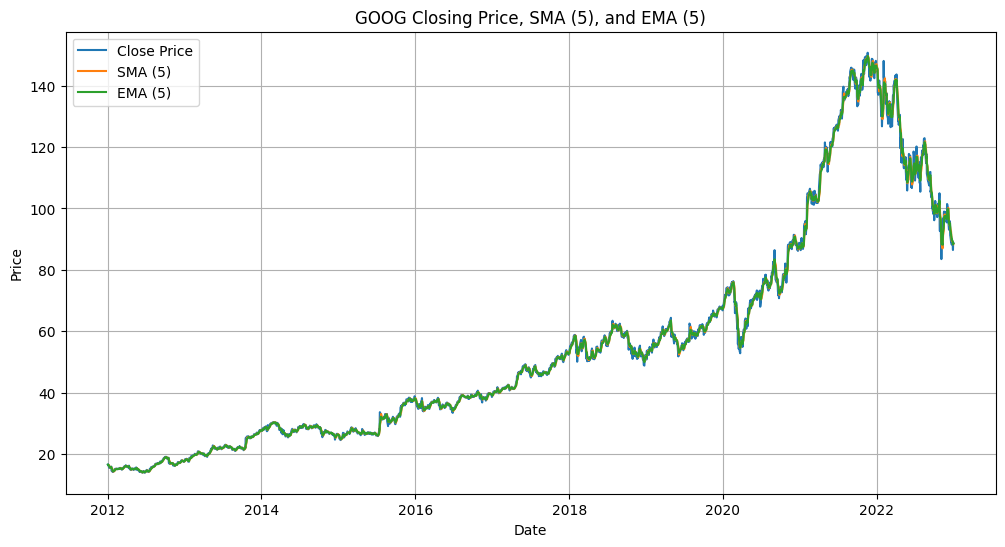

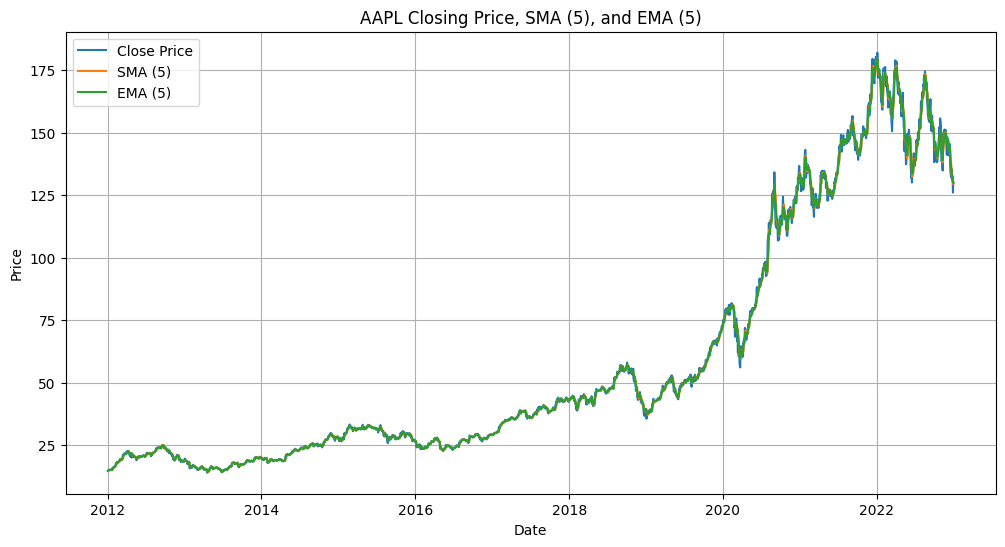

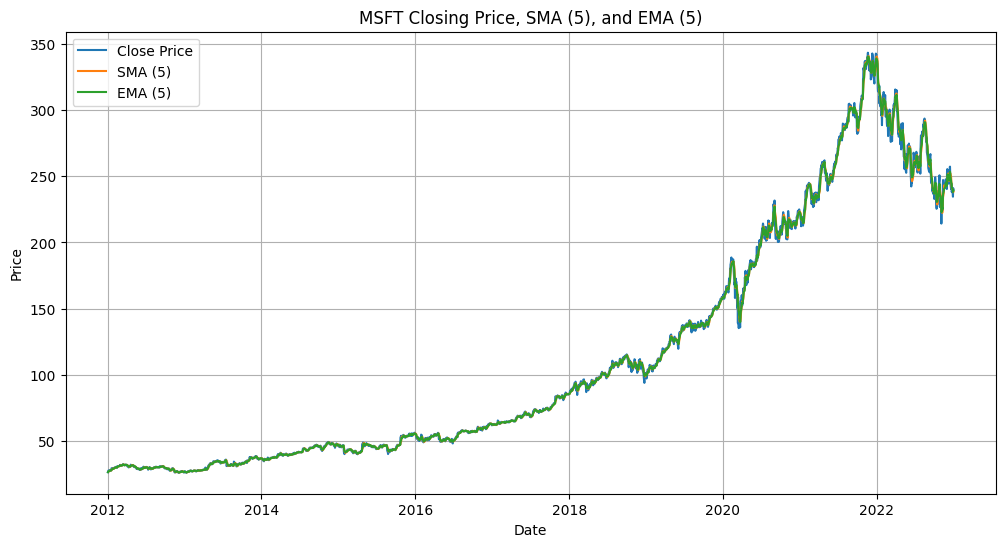

In [9]:
for symbol, df in stock_data.items():
  df['SMA_5'] = df['Close'].rolling(window=5).mean()
  df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()

  plt.figure(figsize=(12, 6))
  plt.plot(df.index, df['Close'], label='Close Price')
  plt.plot(df.index, df['SMA_5'], label='SMA (5)')
  plt.plot(df.index, df['EMA_5'], label='EMA (5)')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title(f'{symbol} Closing Price, SMA (5), and EMA (5)')
  plt.legend()
  plt.grid(True)
  plt.show()

**MACD**  
   - Plot MACD and Signal line for each of the three stocks.
   - Fast Length (Short-term EMA): 12 periods
   - Slow Length (Long-term EMA): 26 periods
   - Signal Line (Smoothing EMA): 9 periods

    

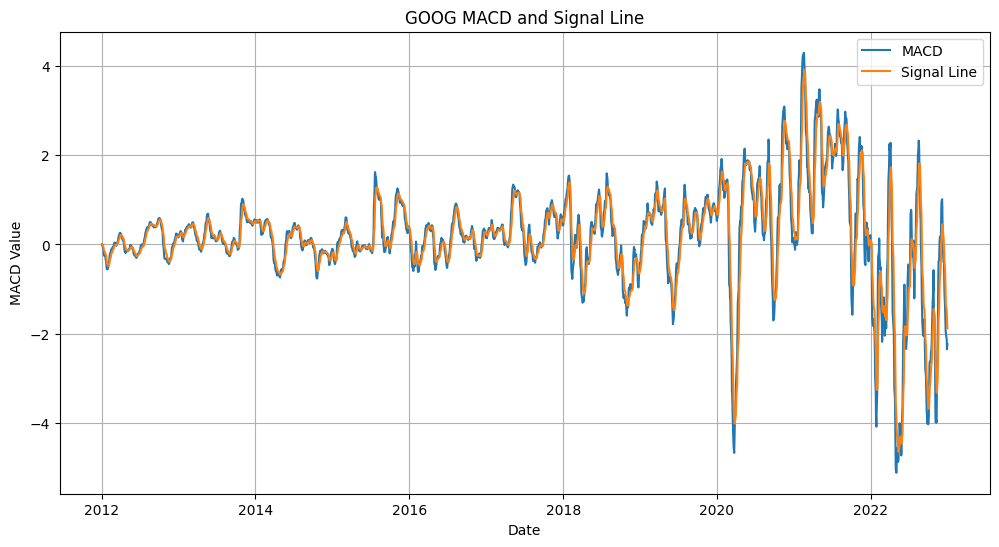

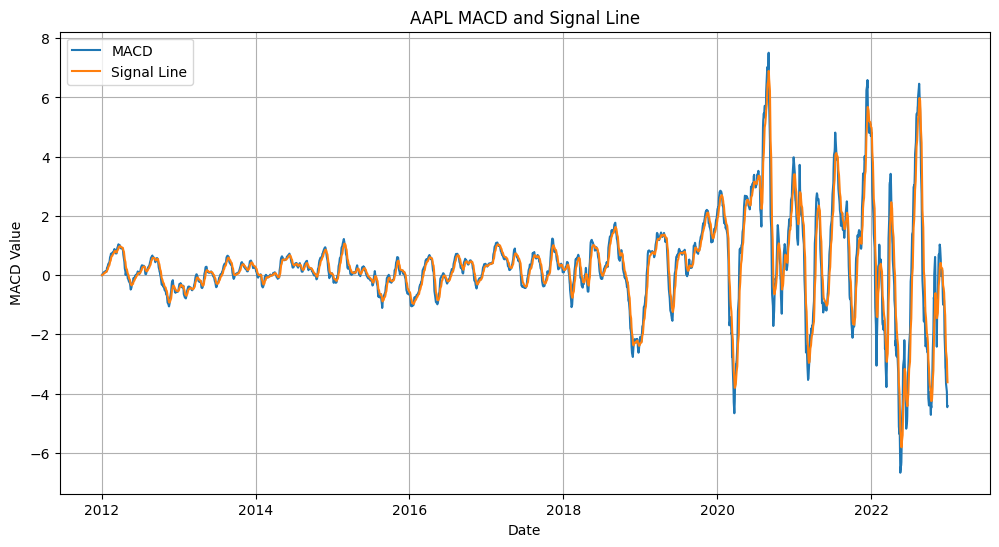

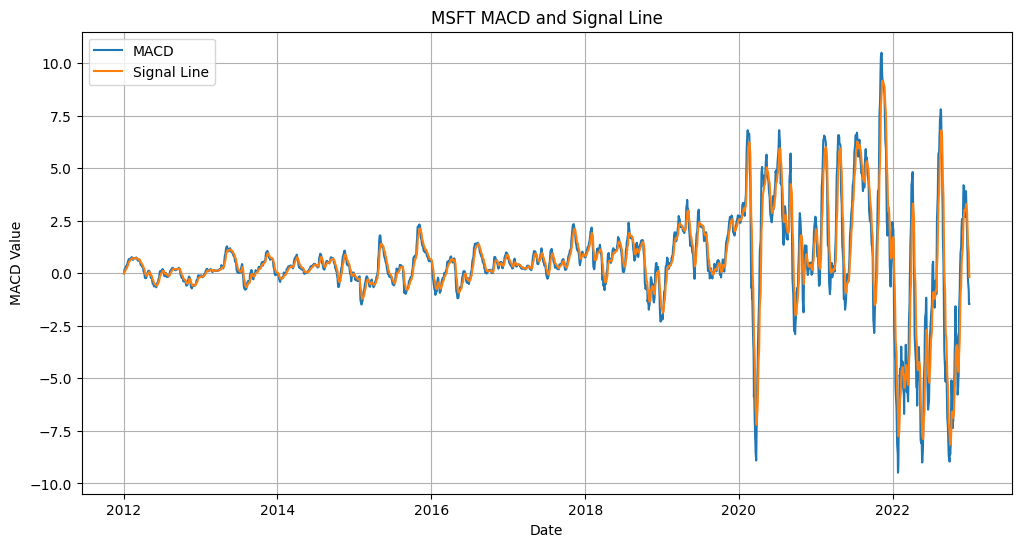

In [10]:
macd_data = {}
for symbol, df in stock_data.items():
  df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
  df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
  df['MACD'] = df['EMA_12'] - df['EMA_26']
  df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
  macd_data[symbol] = df[['MACD', 'Signal_Line']]

for symbol, df in macd_data.items():
  plt.figure(figsize=(12, 6))
  plt.plot(df.index, df['MACD'], label='MACD')
  plt.plot(df.index, df['Signal_Line'], label='Signal Line')
  plt.xlabel('Date')
  plt.ylabel('MACD Value')
  plt.title(f'{symbol} MACD and Signal Line')
  plt.legend()
  plt.grid(True)
  plt.show()

**RSI**  
   - Plot RSI for each of the three stocks
   - Period = 14 days
   - Also show the overbought and oversold regions
   - Overbought condition: RSI above 70
   - Oversold condition: RSI below 30
   
    

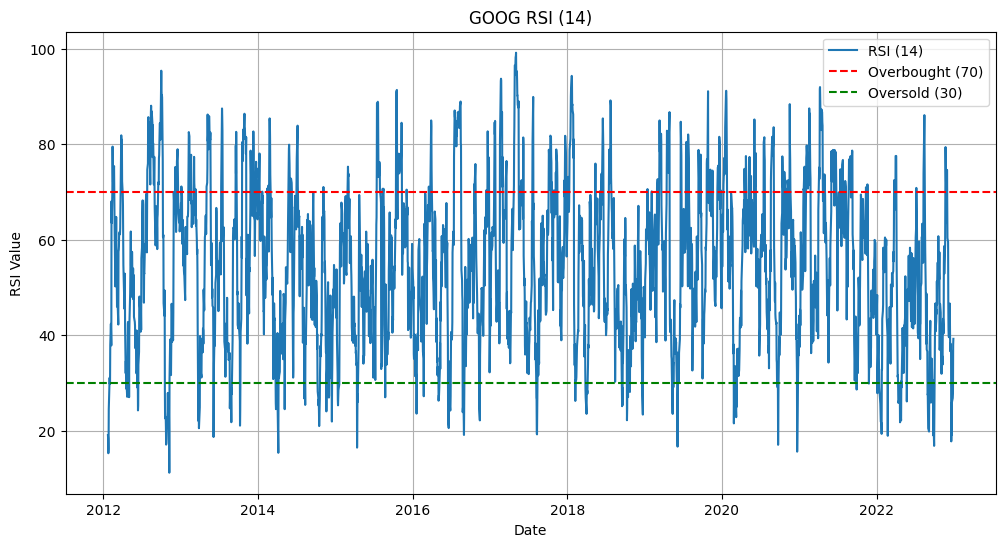

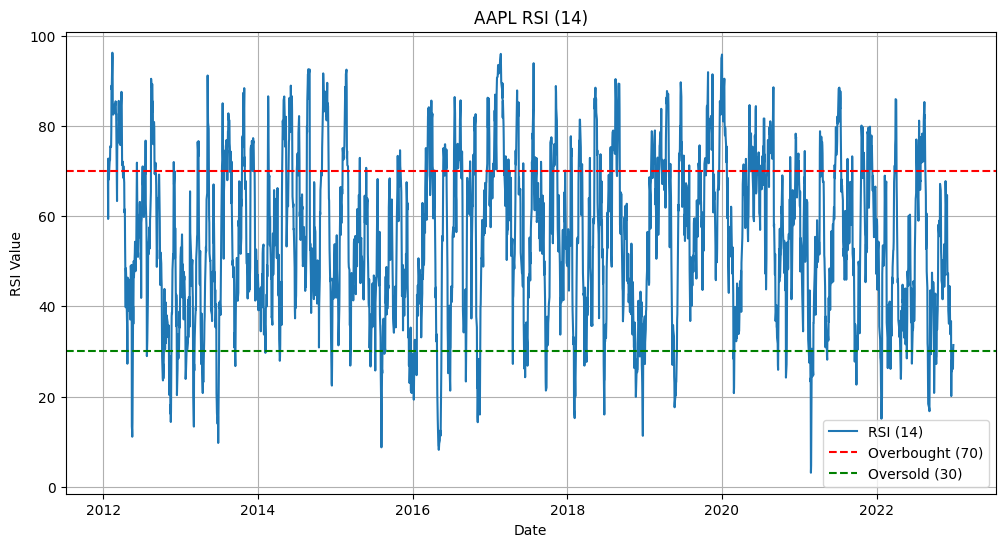

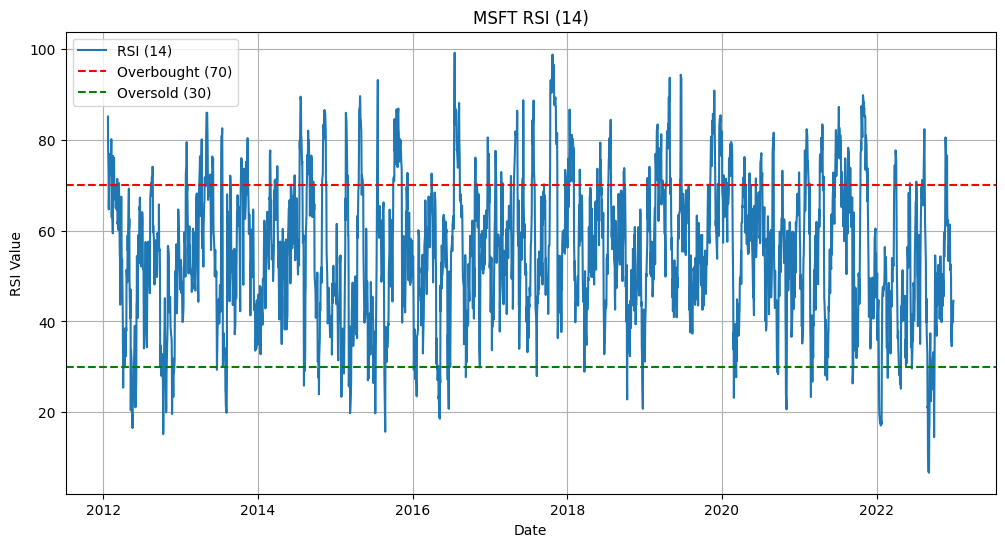

In [11]:
def calculate_rsi(series, period):
  delta = series.diff()
  gain = delta.where(delta > 0, 0)
  loss = -delta.where(delta < 0, 0)

  avg_gain = gain.rolling(window=period).mean()
  avg_loss = loss.rolling(window=period).mean()

  rs = avg_gain / avg_loss
  rsi = 100 - (100 / (1 + rs))
  return rsi

for symbol, df in stock_data.items():
  df['RSI_14'] = calculate_rsi(df['Close'], 14)

  plt.figure(figsize=(12, 6))
  plt.plot(df.index, df['RSI_14'], label='RSI (14)')
  plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
  plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
  plt.xlabel('Date')
  plt.ylabel('RSI Value')
  plt.title(f'{symbol} RSI (14)')
  plt.legend()
  plt.grid(True)
  plt.show()

### Summarize your analysis

In [4]:
# We selected 3 stocks "Google, Apple, MSFT"
# and plotted the closing prices of every stock
# Calculated SMA and EMA
# Plotted MACD and signal line and finaly RSI